<a href="https://colab.research.google.com/github/Prattoypaul/myml/blob/main/Favorite_teacher_servey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import** **Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
data=pd.read_csv('gdrive/My Drive/Colab Notebooks/projectnew/teacher_servey.csv')

In [4]:
data

,Age(Approximately),Gender,Punctuality,Friendly,Teaching strategies,Analysis the Students,Helpful,Motivation learning,manage the class,Democratic,Angriness,Favourite or Not?
0,40.0,Male,5,5.0,5.0,5,5.0,5.0,5.0,5,3,Yes
1,35.0,Male,1,1.0,1.0,3,1.0,1.0,1.0,3,1,No
2,40.0,Male,5,5.0,5.0,5,5.0,5.0,5.0,4,2,Yes
3,29.0,Female,5,5.0,5.0,5,5.0,5.0,5.0,5,3,Yes
4,30.0,Female,4,3.0,3.0,4,4.0,3.0,5.0,5,2,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
421,33.0,Male,1,1.0,2.0,2,2.0,1.0,2.0,2,1,Yes
422,38.0,Female,5,4.0,4.0,5,4.0,3.0,5.0,4,3,Yes
423,37.0,Female,4,3.0,3.0,2,2.0,2.0,2.0,3,2,No
424,33.0,Female,5,5.0,4.0,4,5.0,4.0,5.0,5,2,Yes


**Fill Null Value in Dataset**

In [5]:
data.isnull().sum()

Age(Approximately)       1
Gender                   0
Punctuality              0
Friendly                 2
Teaching strategies      2
Analysis the Students    0
Helpful                  1
Motivation learning      2
manage the class         2
Democratic               0
Angriness                0
Favourite or Not?        0
dtype: int64

In [6]:
age_m=data['Age(Approximately)'].mean()

In [7]:
age_m

39.908235294117645

In [8]:
f_m=data['Friendly'].median()

In [9]:
f_m

4.0

In [10]:
mc_m=data['manage the class'].median()

In [11]:
mv_m=data['Motivation learning'].median()

In [12]:
h_m=data['Helpful'].median()

In [13]:
ts_m=data['Teaching strategies'].median()

In [14]:
data=data.fillna({'Age(Approximately)':age_m,'Friendly':f_m,'Teaching strategies':ts_m,'Helpful':h_m,'Motivation learning':mv_m,'manage the class':mc_m})

In [15]:
data.isnull().sum()

Age(Approximately)       0
Gender                   0
Punctuality              0
Friendly                 0
Teaching strategies      0
Analysis the Students    0
Helpful                  0
Motivation learning      0
manage the class         0
Democratic               0
Angriness                0
Favourite or Not?        0
dtype: int64

In [16]:
data_test=[data]

In [17]:
Gender_mapping ={'Male':1,'Female':0}
for dataset in data_test:
  dataset['Gender']=dataset['Gender'].map(Gender_mapping)

In [18]:
data

,Age(Approximately),Gender,Punctuality,Friendly,Teaching strategies,Analysis the Students,Helpful,Motivation learning,manage the class,Democratic,Angriness,Favourite or Not?
0,40.0,1,5,5.0,5.0,5,5.0,5.0,5.0,5,3,Yes
1,35.0,1,1,1.0,1.0,3,1.0,1.0,1.0,3,1,No
2,40.0,1,5,5.0,5.0,5,5.0,5.0,5.0,4,2,Yes
3,29.0,0,5,5.0,5.0,5,5.0,5.0,5.0,5,3,Yes
4,30.0,0,4,3.0,3.0,4,4.0,3.0,5.0,5,2,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
421,33.0,1,1,1.0,2.0,2,2.0,1.0,2.0,2,1,Yes
422,38.0,0,5,4.0,4.0,5,4.0,3.0,5.0,4,3,Yes
423,37.0,0,4,3.0,3.0,2,2.0,2.0,2.0,3,2,No
424,33.0,0,5,5.0,4.0,4,5.0,4.0,5.0,5,2,Yes


**Simple Visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


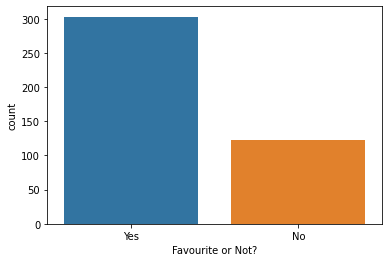

In [19]:
sb.countplot(data['Favourite or Not?'])

In [20]:
data['Favourite or Not?'].value_counts()

Yes    303
No     123
Name: Favourite or Not?, dtype: int64

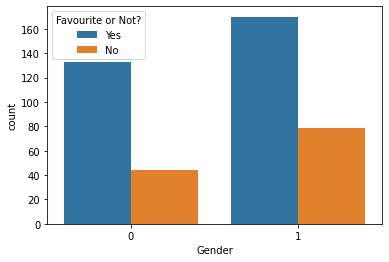

In [21]:
sb.countplot(x='Gender',hue='Favourite or Not?',data=data)

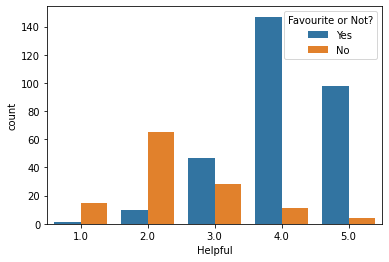

In [22]:
sb.countplot(x='Helpful',hue='Favourite or Not?',data=data)

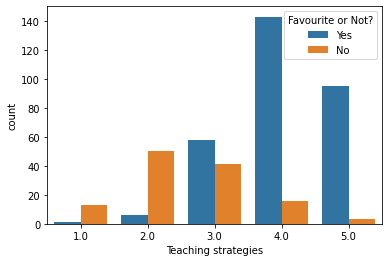

In [23]:
sb.countplot(x='Teaching strategies',hue='Favourite or Not?',data=data)

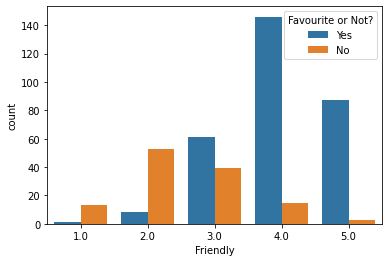

In [24]:
sb.countplot(x='Friendly',hue='Favourite or Not?',data=data)

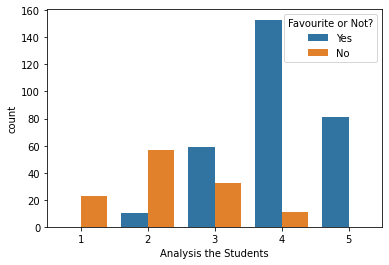

In [25]:
sb.countplot(x='Analysis the Students',hue='Favourite or Not?',data=data)

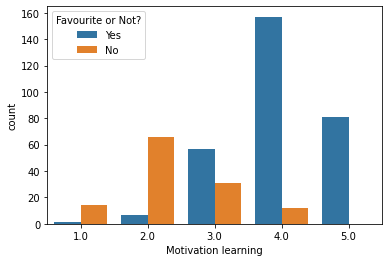

In [26]:
sb.countplot(x='Motivation learning',hue='Favourite or Not?',data=data)

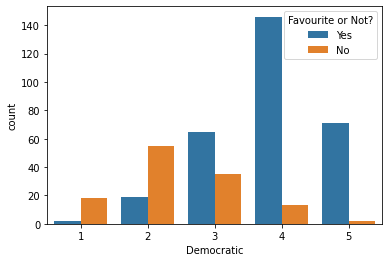

In [27]:
sb.countplot(x='Democratic',hue='Favourite or Not?',data=data)

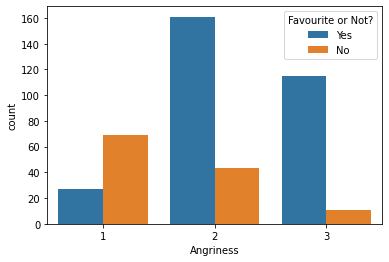

In [28]:
sb.countplot(x='Angriness',hue='Favourite or Not?',data=data)

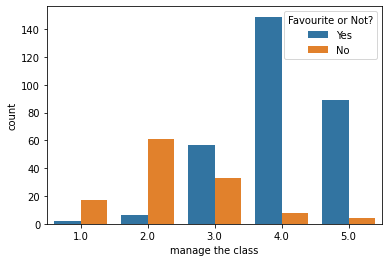

In [29]:
sb.countplot(x='manage the class',hue='Favourite or Not?',data=data)

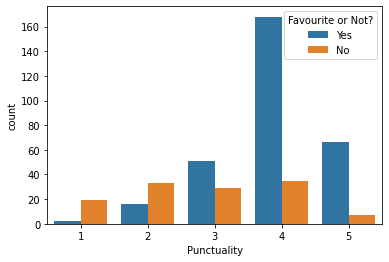

In [30]:
sb.countplot(x='Punctuality',hue='Favourite or Not?',data=data)

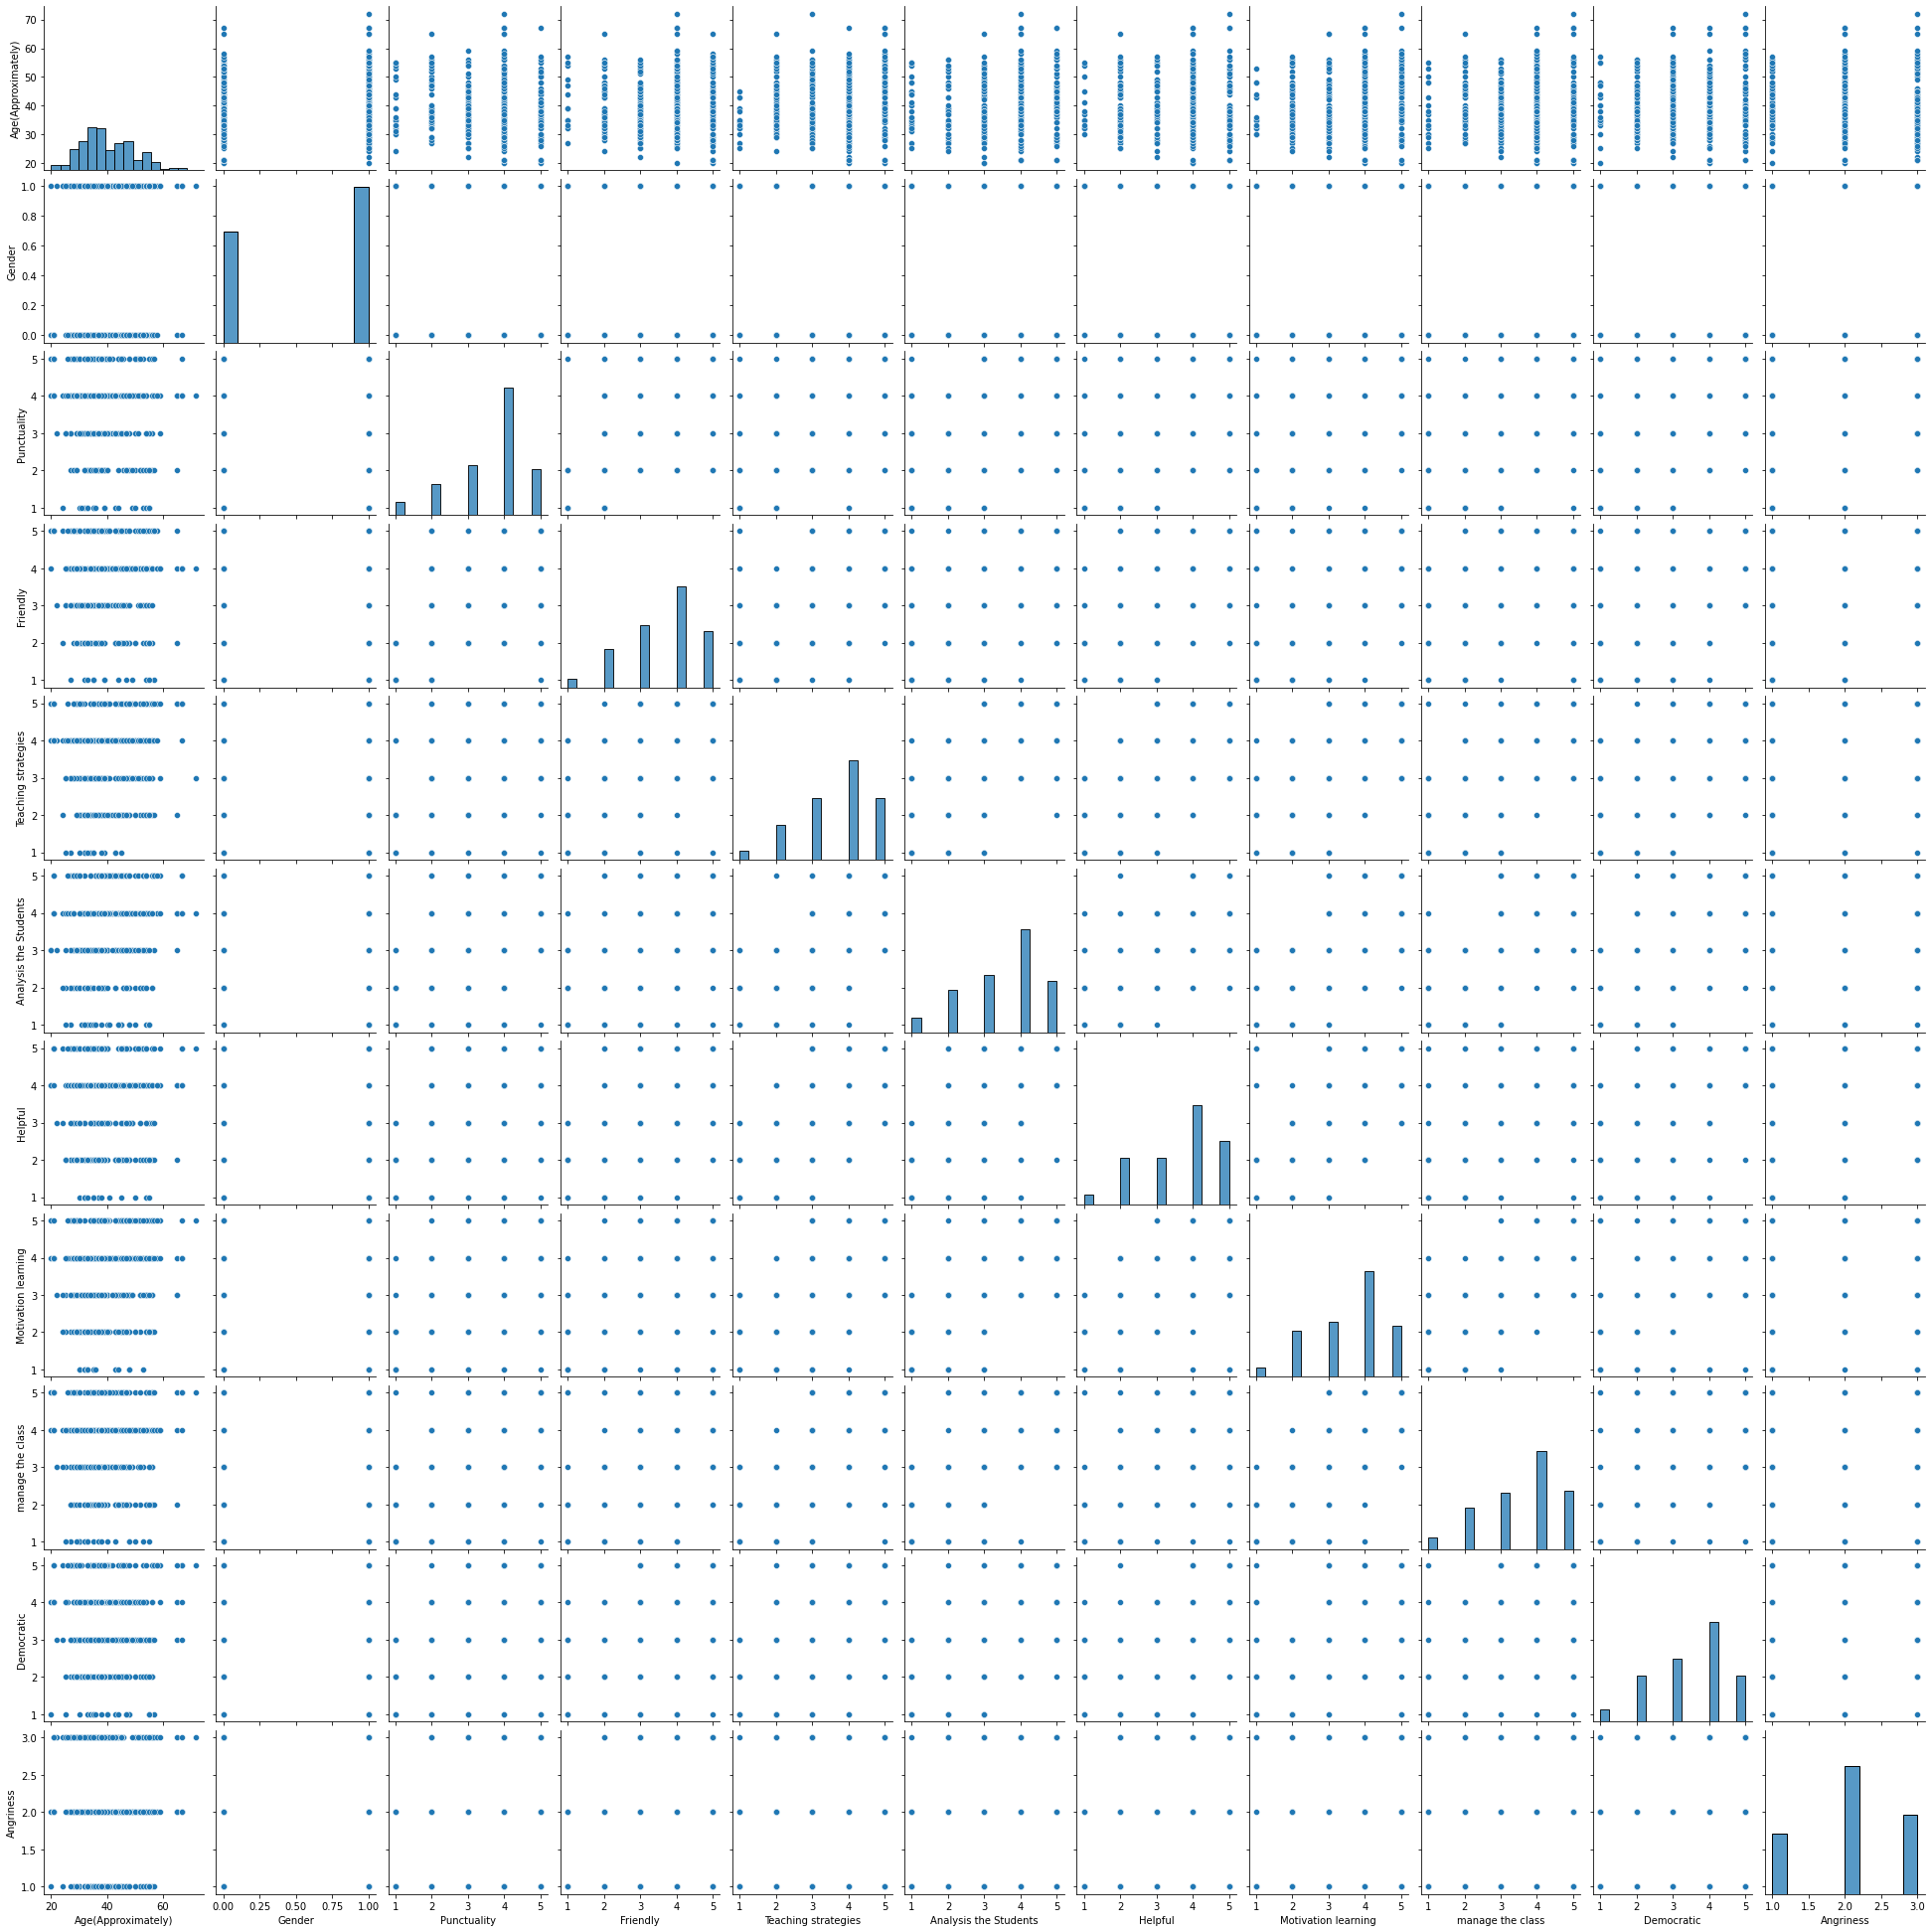

In [31]:
sb.pairplot(data)

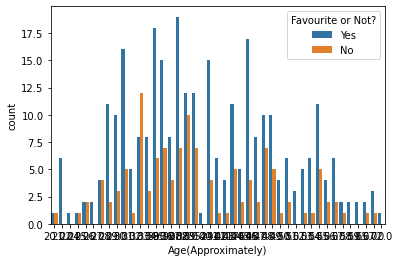

In [32]:
sb.countplot(x='Age(Approximately)',hue='Favourite or Not?',data=data)

**Prepocessing Data**

In [33]:
x=data.iloc[:,:-1]

In [34]:
y=data['Favourite or Not?']

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le=LabelEncoder()

In [37]:
y=le.fit_transform(y)

In [38]:
print(x)
print(y)

     Age(Approximately)  Gender  ...  Democratic  Angriness
0                  40.0       1  ...           5          3
1                  35.0       1  ...           3          1
2                  40.0       1  ...           4          2
3                  29.0       0  ...           5          3
4                  30.0       0  ...           5          2
..                  ...     ...  ...         ...        ...
421                33.0       1  ...           2          1
422                38.0       0  ...           4          3
423                37.0       0  ...           3          2
424                33.0       0  ...           5          2
425                30.0       0  ...           4          3

[426 rows x 11 columns]
[1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1
 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1
 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1

 **Scalling the dataset**

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
ss=StandardScaler()

In [41]:
x=ss.fit_transform(x)

In [42]:
x

array([[ 0.00979347,  0.84311528,  1.32503488, ...,  1.28131512,
         1.40527332,  1.29386895],
       [-0.52382488,  0.84311528, -2.47607529, ..., -2.27464736,
        -0.40606234, -1.4899097 ],
       [ 0.00979347,  0.84311528,  1.32503488, ...,  1.28131512,
         0.49960549, -0.09802037],
       ...,
       [-0.31037754, -1.18607743,  0.37475734, ..., -1.38565674,
        -0.40606234, -0.09802037],
       [-0.73727222, -1.18607743,  1.32503488, ...,  1.28131512,
         1.40527332, -0.09802037],
       [-1.05744322, -1.18607743, -0.5755202 , ...,  1.28131512,
         0.49960549,  1.29386895]])

**Split** **Dataset**

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=42)

**Built RandomForest classifier model and show performence by Performance metics**

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rfc=RandomForestClassifier()

In [47]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
pre=rfc.predict(xtest)

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
accuracy_score(ytest,pre)

0.9158878504672897

In [51]:
from sklearn.metrics import confusion_matrix

In [52]:
confusion_matrix(ytest,pre)

array([[30,  4],
       [ 5, 68]])

In [53]:
from sklearn.metrics import classification_report

In [54]:
print(classification_report(ytest,pre))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        34
           1       0.94      0.93      0.94        73

    accuracy                           0.92       107
   macro avg       0.90      0.91      0.90       107
weighted avg       0.92      0.92      0.92       107



In [55]:
from sklearn.linear_model import LogisticRegression

**Built Logistic Regression model and show performence by Performance metics**

In [56]:
lgr=LogisticRegression()

In [57]:
lgr.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
pred=lgr.predict(xtest)

In [59]:
accuracy_score(ytest,pred)

0.9158878504672897

In [60]:
confusion_matrix(ytest,pred)

array([[29,  5],
       [ 4, 69]])

In [61]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        34
           1       0.93      0.95      0.94        73

    accuracy                           0.92       107
   macro avg       0.91      0.90      0.90       107
weighted avg       0.92      0.92      0.92       107



**Built DecisionTreeClassifier model and show performence by Performance metics**

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
dc=DecisionTreeClassifier()

In [64]:
dc.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [65]:
dc.score(xtest,ytest)

0.8878504672897196

In [66]:
Dc_pre=dc.predict(xtest)

In [67]:
confusion_matrix(ytest,Dc_pre)

array([[31,  3],
       [ 9, 64]])

In [68]:
print(classification_report(ytest,Dc_pre))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        34
           1       0.96      0.88      0.91        73

    accuracy                           0.89       107
   macro avg       0.87      0.89      0.88       107
weighted avg       0.90      0.89      0.89       107



**Built Support vector Classifier model and show performence by Performance metics**

In [69]:
from sklearn.svm import SVC

In [70]:
svc=SVC()

In [72]:
svc.fit(xtrain,ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [73]:
svc_p=svc.predict(xtest)

In [74]:
accuracy_score(ytest,svc_p)

0.9065420560747663

In [75]:
confusion_matrix(ytest,svc_p)

array([[28,  6],
       [ 4, 69]])

In [76]:
print(classification_report(ytest,svc_p))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        34
           1       0.92      0.95      0.93        73

    accuracy                           0.91       107
   macro avg       0.90      0.88      0.89       107
weighted avg       0.91      0.91      0.91       107



**Built Gaussian Naive_bayes model and show performence by Performance metics**

In [77]:
from sklearn.naive_bayes import GaussianNB

In [78]:
gnb=GaussianNB()

In [79]:
gnb.fit(xtrain,ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [80]:
gnb_p=gnb.predict(xtest)

In [81]:
accuracy_score(ytest,gnb_p)

0.897196261682243

In [82]:
confusion_matrix(ytest,gnb_p)

array([[31,  3],
       [ 8, 65]])

In [83]:
print(classification_report(ytest,gnb_p))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85        34
           1       0.96      0.89      0.92        73

    accuracy                           0.90       107
   macro avg       0.88      0.90      0.89       107
weighted avg       0.90      0.90      0.90       107

